<a href="https://colab.research.google.com/github/Kusuma-Bhargavi-Nadendla/Machine-Learning/blob/main/MLLab2_IPLDataLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("IPL_Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [ ]:
data.iloc[0:5,15:22] #get 5 rows with 12 columns

,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON
0,0.00,0.00,0,307,15,20.47,8.90
1,0.00,0.00,0,29,0,0.00,14.50
2,18.56,121.01,5,1059,29,36.52,8.81
3,5.80,76.32,0,1125,49,22.96,6.23
4,32.93,120.71,28,0,0,0.00,0.00


In [ ]:
data.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [ ]:
#extract features
x_features=[ 'AGE', 'COUNTRY','PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']
y_features=['SOLD PRICE']

In [ ]:
#encode categorical variables
categ_v=['AGE', 'COUNTRY','PLAYING ROLE','CAPTAINCY EXP']
encoded_data=pd.get_dummies(data[x_features],columns=categ_v,drop_first=True)
encoded_data.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [ ]:
encoded_data

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,False,False,True,False,False,False,False,False,False,False
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,False,False,False,False,False,False,False,True,False,False
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,False,False,False,False,False,False,False,True,False,False
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,False,False,False,False,False,False,False,True,False,False
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.80,125.64,...,False,False,False,False,False,False,True,False,False,False
126,6398,7,6814,75.78,3,86.6,3,3,3.00,42.85,...,False,True,False,False,False,False,True,False,False,True
127,1775,9,8051,87.58,109,44.3,1237,66,26.32,131.88,...,False,False,False,False,False,False,True,False,False,True
128,1114,288,790,73.55,278,35.4,99,23,9.90,91.67,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
encoded_data.iloc[0:5,15:]

,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,13.93,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0.00,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,24.90,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,22.14,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,0.00,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False


In [ ]:
X=sm.add_constant(encoded_data)
Y=data[y_features]

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=50)

In [ ]:
ipl_model=sm.OLS(train_y,train_x).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
ipl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SOLD PRICE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     3.466
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           2.00e-05
Time:                        08:10:05   Log-Likelihood:                -1264.1
No. Observations:                  91   AIC:                             2592.
Df Residuals:                      59   BIC:                             2673.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.511e+05   2.42e+05      1.036      0.304   -2.34e+05    7.36e+05
T-RUNS                   -23.2807     36.096     -0.645      0.521     -95.508      48.947
T-WKTS                   207.3153    628.233      0.330      0.743   -1049.777    1464.407
ODI-RUNS-S                49.9468     35.373      1.412      0.163     -20.835     120.728
ODI-SR-B                 190.9563   1711.011      0.112      0.912   -3232.769    3614.681
ODI-WKTS                 158.3655    877.319      0.181      0.857   -1597.146    1913.877
ODI-SR-BL              -2011.6657   1884.658     -1.067      0.290   -5782.859    1759.527
RUNS-S                   104.2555    164.507      0.634      0.529    -224.922     433.433
HS                     -1209.0924   2921.904     -0.414      0.681   -7055.808    4637.624
AVE                     4176.4119   8150.389      0.512      0.610   -1.21e+04    2.05e+04
SR-B                    -762.2459   1394.972     -0.546      0.587   -3553.579    2029.087
SIXERS                  3680.5040   3516.805      1.047      0.300   -3356.606    1.07e+04
RUNS-C                    60.5792    302.238      0.200      0.842    -544.199     665.357
WKTS                    2162.0762   7449.793      0.290      0.773   -1.27e+04    1.71e+04
AVE-BL                 -6929.9437   1.31e+04     -0.528      0.600   -3.32e+04    1.94e+04
ECON                    3471.2899   1.34e+04      0.259      0.797   -2.34e+04    3.03e+04
SR-BL                    1.77e+04   1.95e+04      0.909      0.367   -2.13e+04    5.67e+04
AGE_2                  -2.497e+05   1.32e+05     -1.887      0.064   -5.15e+05    1.51e+04
AGE_3                  -2.112e+05   1.81e+05     -1.166      0.248   -5.73e+05    1.51e+05
COUNTRY_BAN             9.681e+04   4.43e+05      0.218      0.828   -7.91e+05    9.84e+05
COUNTRY_ENG             6.363e+05    2.5e+05      2.547      0.014    1.36e+05    1.14e+06
COUNTRY_IND             2.348e+05   1.36e+05      1.726      0.090   -3.74e+04    5.07e+05
COUNTRY_NZ              4.276e+04   1.85e+05      0.231      0.818   -3.28e+05    4.13e+05
COUNTRY_PAK             1.794e+05   1.88e+05      0.954      0.344   -1.97e+05    5.56e+05
COUNTRY_SA              -5.46e+04   1.52e+05     -0.360      0.720   -3.58e+05    2.49e+05
COUNTRY_SL              3.758e+04    1.8e+05      0.209      0.835   -3.22e+05    3.97e+05
COUNTRY_WI             -2.432e+05   1.99e+05     -1.221      0.227   -6.42e+05    1.55e+05
COUNTRY_ZIM              108.9210   3.96e+05      0.000      1.000   -7.93e+05    7.93e+05
PLAYING ROLE_Batsman     1.95e+05   1.66e+05      1.178      0.243   -1.36e+05    5.26e+05
PLAYING ROLE_Bowler     -9.91e+04   1.36e+05     -0.730      0.468   -3.71e+05    1.72e+05
PLAYING ROLE_W. Keeper -1.061e+04   2.47e+05     -0.043      0.966   -5.05e+05  

In [ ]:
pred_y=ipl_model.predict(test_x)
r2value=metrics.r2_score(pred_y,test_y)
np.abs(r2value)

0.12447983586672806

In [ ]:
#rmse value
rmse=np.sqrt(metrics.mean_squared_error(pred_y,test_y))
rmse

422740.71257338783

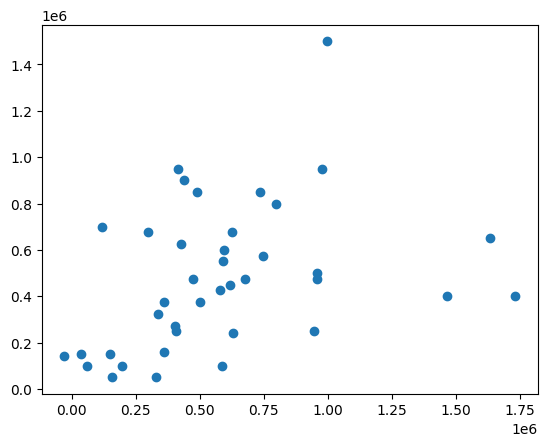

In [ ]:
plt.scatter(pred_y,test_y)

In [ ]:
#Accuracy is quite low. So we need to handle Multicollinearity by variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_values(x):
  vif=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif_factors=pd.DataFrame()
  vif_factors['column']=x.columns
  vif_factors['vif']=vif
  return vif_factors

In [ ]:
vif_fac=get_vif_values(encoded_data)
vif_fac

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [ ]:
col_large_vif=vif_fac[vif_fac['vif']>4].column
col_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

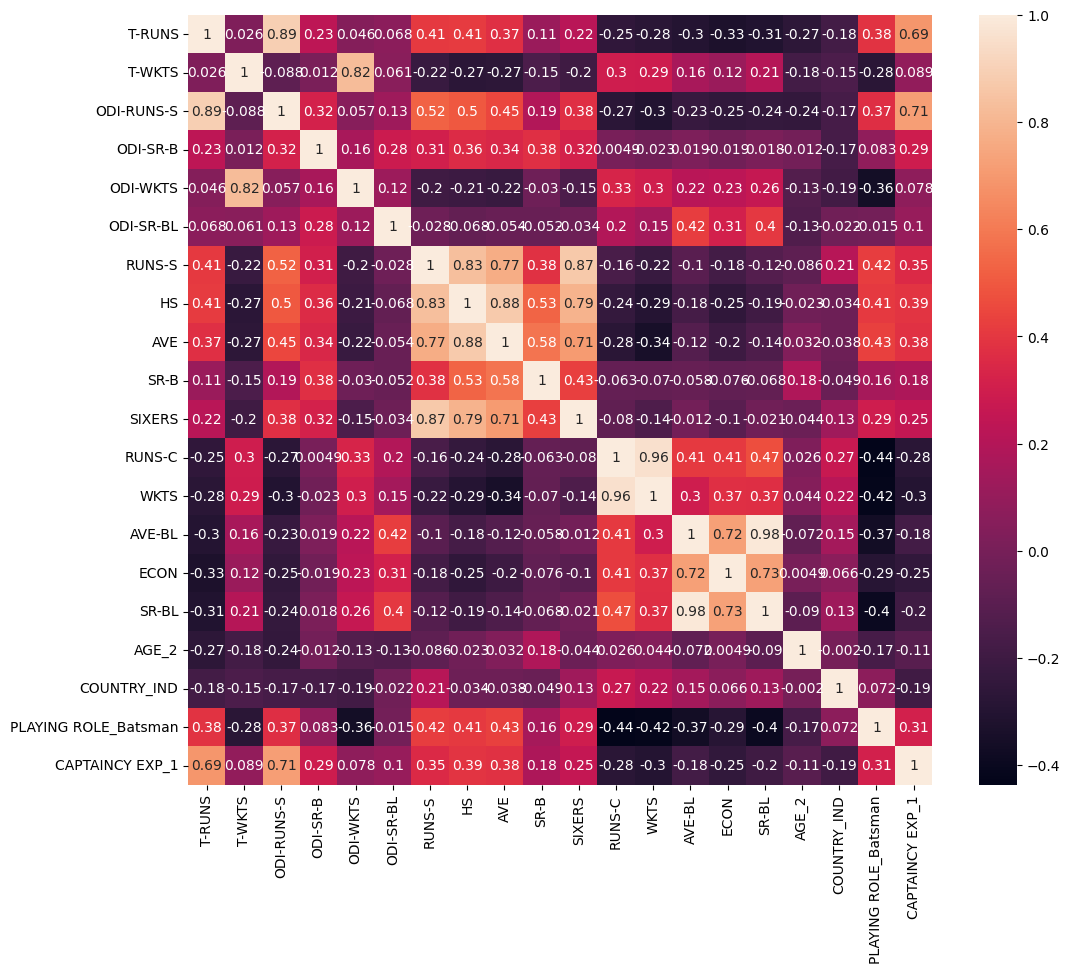

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
hm=sns.heatmap(X[col_large_vif].corr(),annot=True)



In [ ]:
col_to_be_removed=['T-RUNS','T-WKTS', 'RUNS-S','HS',  'AVE',  'RUNS-C', 'SR-B', 'AVE-BL', 'ECON',  'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2','SR-BL']
new_x_features=list(set(encoded_data.columns)-set(col_to_be_removed))
new_x_features

['COUNTRY_SA',
 'ODI-WKTS',
 'PLAYING ROLE_W. Keeper',
 'COUNTRY_BAN',
 'COUNTRY_NZ',
 'SIXERS',
 'COUNTRY_WI',
 'WKTS',
 'PLAYING ROLE_Bowler',
 'COUNTRY_PAK',
 'COUNTRY_ENG',
 'CAPTAINCY EXP_1',
 'AGE_3',
 'COUNTRY_ZIM',
 'PLAYING ROLE_Batsman',
 'ODI-SR-BL',
 'COUNTRY_IND',
 'COUNTRY_SL']

In [ ]:
new_vif=get_vif_values(X[new_x_features])
new_vif

#We can see that all the new variables have VIF values less than 4 only which indicates no multicollinearity.


,column,vif
0,COUNTRY_SA,1.416657
1,ODI-WKTS,2.742889
2,PLAYING ROLE_W. Keeper,1.900941
3,COUNTRY_BAN,1.094293
4,COUNTRY_NZ,1.173418
5,SIXERS,2.397409
6,COUNTRY_WI,1.194093
7,WKTS,2.883101
8,PLAYING ROLE_Bowler,3.060168
9,COUNTRY_PAK,1.334773


In [ ]:
#build new model with new features
train_x=train_x[new_x_features]
test_x=test_x[new_x_features]
model2=sm.OLS(train_y,train_x).fit()


In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             SOLD PRICE   R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              19.28
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                    8.14e-21
Time:                        08:54:46   Log-Likelihood:                         -1273.8
No. Observations:                  91   AIC:                                      2584.
Df Residuals:                      73   BIC:                                      2629.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
COUNTRY_SA              1.106e+05   1.19e+05      0.929      0.356   -1.27e+05    3.48e+05
ODI-WKTS                 288.5803    477.383      0.605      0.547    -662.842    1240.003
PLAYING ROLE_W. Keeper -1.938e+05    1.6e+05     -1.209      0.230   -5.13e+05    1.26e+05
COUNTRY_BAN             4.106e+04    3.5e+05      0.117      0.907   -6.57e+05    7.39e+05
COUNTRY_NZ              9.928e+04   1.62e+05      0.612      0.542   -2.24e+05    4.22e+05
SIXERS                  8756.2449   1756.271      4.986      0.000    5256.002    1.23e+04
COUNTRY_WI             -1.977e+05   1.63e+05     -1.215      0.228   -5.22e+05    1.27e+05
WKTS                    2193.0492   2015.191      1.088      0.280   -1823.221    6209.319
PLAYING ROLE_Bowler    -6.547e+04   1.03e+05     -0.638      0.526    -2.7e+05    1.39e+05
COUNTRY_PAK             2.238e+05   1.52e+05      1.469      0.146   -7.99e+04    5.28e+05
COUNTRY_ENG             7.209e+05   2.04e+05      3.530      0.001    3.14e+05    1.13e+06
CAPTAINCY EXP_1         2.274e+05   9.66e+04      2.354      0.021    3.49e+04     4.2e+05
AGE_3                   1.517e+05   9.94e+04      1.525      0.132   -4.65e+04     3.5e+05
COUNTRY_ZIM              6.74e+04   3.69e+05      0.183      0.856   -6.68e+05    8.03e+05
PLAYING ROLE_Batsman    9.165e+04   9.82e+04      0.933      0.354   -1.04e+05    2.87e+05
ODI-SR-BL                559.2014   1400.488      0.399      0.691   -2231.966    3350.369
COUNTRY_IND             4.059e+05      1e+05      4.058      0.000    2.07e+05    6.05e+05
COUNTRY_SL              1.844e+05   1.41e+05      1.309      0.195   -9.63e+04    4.65e+05
==============================================================================
Omnibus:                        3.872   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.395
Skew:                           0.469   Prob(JB):                        0.183
Kurtosis:                       3.128   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#make predictions
pred_y=model2.predict(test_x)
r2_value2=metrics.r2_score(test_y,pred_y)
print('New R2 Value is ',np.abs(r2_value2))
#We can see that the performance of the model increased after removal of Multi collinearity.

New R2 Value is  0.6651109871518253


In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             SOLD PRICE   R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              19.28
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                    8.14e-21
Time:                        08:59:40   Log-Likelihood:                         -1273.8
No. Observations:                  91   AIC:                                      2584.
Df Residuals:                      73   BIC:                                      2629.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
COUNTRY_SA              1.106e+05   1.19e+05      0.929      0.356   -1.27e+05    3.48e+05
ODI-WKTS                 288.5803    477.383      0.605      0.547    -662.842    1240.003
PLAYING ROLE_W. Keeper -1.938e+05    1.6e+05     -1.209      0.230   -5.13e+05    1.26e+05
COUNTRY_BAN             4.106e+04    3.5e+05      0.117      0.907   -6.57e+05    7.39e+05
COUNTRY_NZ              9.928e+04   1.62e+05      0.612      0.542   -2.24e+05    4.22e+05
SIXERS                  8756.2449   1756.271      4.986      0.000    5256.002    1.23e+04
COUNTRY_WI             -1.977e+05   1.63e+05     -1.215      0.228   -5.22e+05    1.27e+05
WKTS                    2193.0492   2015.191      1.088      0.280   -1823.221    6209.319
PLAYING ROLE_Bowler    -6.547e+04   1.03e+05     -0.638      0.526    -2.7e+05    1.39e+05
COUNTRY_PAK             2.238e+05   1.52e+05      1.469      0.146   -7.99e+04    5.28e+05
COUNTRY_ENG             7.209e+05   2.04e+05      3.530      0.001    3.14e+05    1.13e+06
CAPTAINCY EXP_1         2.274e+05   9.66e+04      2.354      0.021    3.49e+04     4.2e+05
AGE_3                   1.517e+05   9.94e+04      1.525      0.132   -4.65e+04     3.5e+05
COUNTRY_ZIM              6.74e+04   3.69e+05      0.183      0.856   -6.68e+05    8.03e+05
PLAYING ROLE_Batsman    9.165e+04   9.82e+04      0.933      0.354   -1.04e+05    2.87e+05
ODI-SR-BL                559.2014   1400.488      0.399      0.691   -2231.966    3350.369
COUNTRY_IND             4.059e+05      1e+05      4.058      0.000    2.07e+05    6.05e+05
COUNTRY_SL              1.844e+05   1.41e+05      1.309      0.195   -9.63e+04    4.65e+05
==============================================================================
Omnibus:                        3.872   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.395
Skew:                           0.469   Prob(JB):                        0.183
Kurtosis:                       3.128   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#From the above p-values only 4 features :COUNTRY_IND, COUNTRY_ENG, SIXERS, CAPTAINCYEXP_1 have p-value<0.05 and are significant
#So  let's build a new model with these significant features
significant_features=['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1']
train_x=train_x[significant_features]
test_x=test_x[significant_features]
model3=sm.OLS(train_y,train_x).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             SOLD PRICE   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              69.38
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                    2.94e-26
Time:                        09:03:47   Log-Likelihood:                         -1288.2
No. Observations:                  91   AIC:                                      2584.
Df Residuals:                      87   BIC:                                      2594.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
COUNTRY_IND      4.509e+05    6.7e+04      6.735      0.000    3.18e+05    5.84e+05
COUNTRY_ENG      7.207e+05   2.06e+05      3.500      0.001    3.11e+05    1.13e+06
SIXERS           9290.1016   1554.742      5.975      0.000    6199.883    1.24e+04
CAPTAINCY EXP_1  3.656e+05    7.7e+04      4.751      0.000    2.13e+05    5.19e+05
==============================================================================
Omnibus:                        0.951   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.516
Skew:                           0.151   Prob(JB):                        0.772
Kurtosis:                       3.212   Cond. No.                         167.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_y=model3.predict(test_x)
r2_value3=metrics.r2_score(test_y,pred_y)
print('R2 value for Model3:',np.abs(r2_value3))

R2 value for Model3: 0.597689514795859


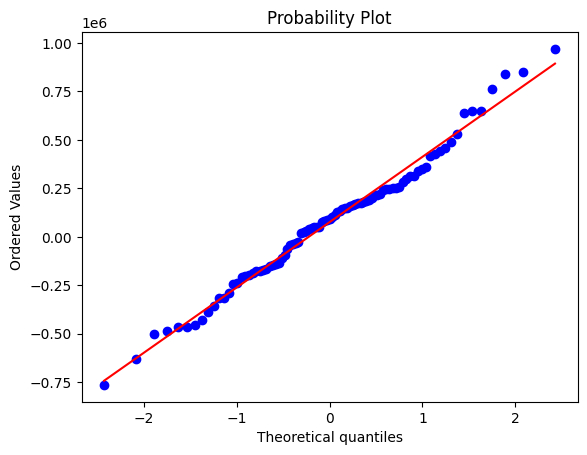

In [ ]:

#Probability plot (Test for normality of residuals)
import matplotlib.pyplot as plt
from scipy.stats import probplot
%matplotlib inline
def draw_pp_plot( model, title ):
    probplot( model.resid,plot=plt);
draw_pp_plot(model3,"");

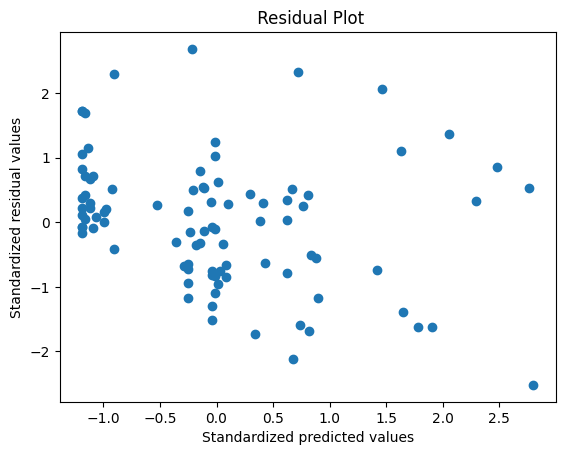

In [ ]:
#Residual Plot for Homoscedasticity

def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()
def plot_resid_fitted(fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ),
    get_standardized_values( resid ) )

    plt.title(title)
    plt.xlabel("Standardized predicted values")
    plt.ylabel("Standardized residual values")
    plt.show()
plot_resid_fitted(model3.fittedvalues,model3.resid," Residual Plot")

#Since there is no shape of funnel, Heteroscedasticty is absent

In [ ]:
#Detecting influencers

k = train_x.shape[1]
n = train_x.shape[0]
print("Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value:", round(leverage_cutoff, 3) )

Number of variables: 4  and number of observations: 91
Cutoff for leverage value: 0.165


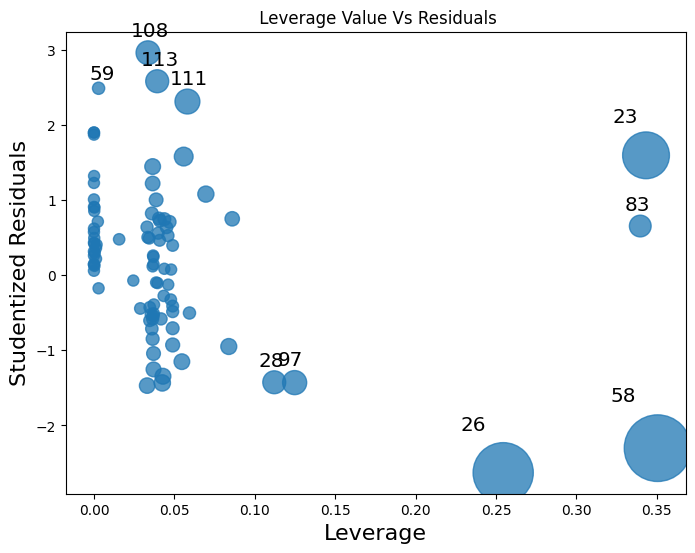

In [ ]:

from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot(model3, ax = ax )
plt.title( " Leverage Value Vs Residuals" )
plt.show()
'''From the diagram, shows there are three observations 23, 58, 83 that
 have comparatively high leverage with residuals. We can filter out the influential observations'''

In [ ]:
data[data.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


0.16

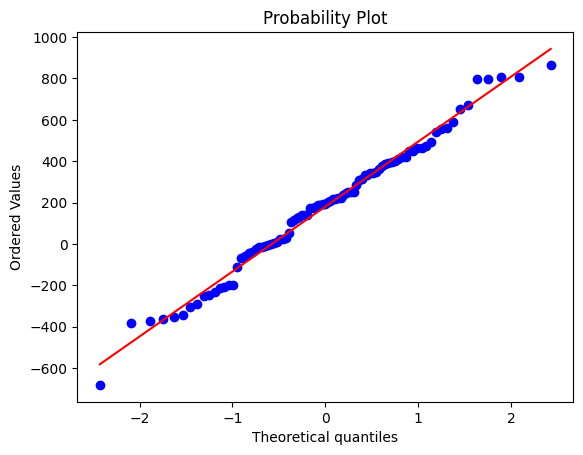

In [ ]:
train_X_new = train_x.drop([23, 58, 83], axis = 0)
train_y_new = train_y.drop([23, 58, 83], axis = 0)




train_y = np.sqrt(train_y)
ipl_model_4 = sm.OLS(train_y, train_x).fit()
ipl_model_4.summary2()




draw_pp_plot(ipl_model_4,"Figure 4.9 - Normal P-P Plot of Regression Standardized Residuals");




pred_y = np.power(ipl_model_4.predict(test_x[train_x.columns]),2)
pred_y




from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))




np.round( metrics.r2_score(pred_y, test_y), 2 )